# Palmer Penguins Machine Learning Project     
### By Alison King
The goal for this project is to determine a small set of measurements that are highly predictive of a penguin's species. To train and evaluate our models, we will use the Palmer Penguins data set, which was collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. This data set contains measurements on three penguin species: Chinstrap, Gentoo, and Adelie


## 1. Data Import and Cleaning

First, we need to import `pandas` to read our data into a dataframe. A pandas dataframe is similar to an Excel table.

In [1]:
import pandas as pd

Use the `read_csv()` function to read the penguins data, which can be found [here](https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv).
We can look at the first 5 rows of the dataframe using the `head()` function to get an idea of what data we are working with.

In [2]:
penguins = pd.read_csv("palmer_penguins.csv")
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In the penguins data, we can see that there are many recorded features that may be relevant to predicting the species, such as the Culmen (Beak) Length, Culmen Depth, or Body Mass. 

However, there are columns that we don't need, such as Sample Number or Individual ID. 
To make it easier to work with the data, we need to "clean" our data by removing these unnecesarry columns. 

For machine learning, we first need to randomly separate our data into a training set and a test set. This will ensure that information from our cleaning process doesn't accidentally pollute our test set. The `sklearn.model_selection` module has a function `train_test_split()` that does this for us. The `test_size` indicates what proportion of the data will be separated into the test set, and the remaining data belonging in the training set.

In [3]:
# split into training (80%) and test (20%) sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(penguins, test_size = 0.2)
train.shape, test.shape

((275, 17), (69, 17))

We can see that the training set has 275 penguins and the test set has 69 penguins, which shows that it has been split 80%-20%

After we separate our data, we need to clean it by removing unecesarry columns. We should also recode strings as numbers to make it easier to work with. Since we need to clean both the training and the test set, it will be easier to write this process as a function.

First, we need to import `preprocessing` from the `sklearn` module, which will help us recode the strings.

The function `clean_data()`, which takes one argument (data), cleans data through the following steps:

1. Creates a copy of the dataframe to avoid changing the original dataframe, then drops all NaN (missing) values. 
2. Recodes the sex of the penguins into 1 and 2 for male and female, respectively.
3. Recodes the species of the penguins into 0, 1, and 2 for Adelie, Chinstrap, and Gentoo, respectively.
4. Drops columns "studyName", "Sample Number", "Stage", "Individual ID", "Clutch Completion", "Date Egg", "Comments", as they are not relevant to predicting the species.

The function should return a cleaned version of the data split into predictor (X) and target (y) data.
    

In [4]:
# cleaning operation fuction
from sklearn import preprocessing
    
def clean_data(data):
    """
    Cleans data by:
        dropping NaN values,
        recoding Sex and Species columns to numbers,
        removing "studyName", "Sample Number", "Stage", "Individual ID",
        "Clutch Completion", "Date Egg", and "Comments" columns. 
    """
    # create a copy of original data
    df = data.copy()
    # drop columns that aren't necesarry
    drop_cols = ["studyName",
                 "Sample Number",
                 "Stage",
                 "Individual ID",
                 "Clutch Completion",
                 "Date Egg",
                 "Comments",
                 "Region"]  
    df = df.drop(drop_cols, axis = 1)
    
    # change Sex to 0 (male) and 1 (female)
    le = preprocessing.LabelEncoder()
    df["Sex"] = le.fit_transform(df["Sex"])
    
    # change Species to 0 (Adelie), 1 (Chinstrap), and 2 (Gentoo)
    df["Species"] = le.fit_transform(df["Species"])
    
    # change Island to 0 (), 1 (), and 2 ()
    df["Island"] = le.fit_transform(df["Island"])
    
    # drop NaN values
    df = df.dropna()
      
    # separate into predictor (X) and target (y) variable
    X = df.drop(["Species"], axis = 1)
    y = df["Species"]
    
    return(X, y)

From here, we can call the function to clean the training and test sets.

In [5]:
X_train, y_train = clean_data(train)
X_test, y_test = clean_data(test)

## 2. Exploratory Analysis
### (a) Displayed table

In [6]:
# select only these columns to display
value_cols = ["Culmen Length (mm)", 
              "Culmen Depth (mm)",
              "Body Mass (g)"]

We can use the `groupby()` function to easily create a table based on the grouped columns. 

In [7]:
df = pd.concat((X_train, y_train), axis = 1)
df.groupby(["Sex", "Species"]).mean()[value_cols].round(2)

Culmen Length (mm)  Culmen Depth (mm)  Body Mass (g)
Sex Species                                                      
0   0                     37.18              17.64        3380.08
    1                     46.92              17.66        3513.89
    2                     45.68              14.25        4702.44
1   0                     40.36              19.12        4045.83
    1                     51.05              19.28        3966.00
    2                     49.77              15.70        5506.91
2   0                     39.90              18.65        3775.00
    2                     46.00              14.17        4491.67

The `grouby()` method first groups the penguins by sex, then within each sex separates rows of the three species. From there we can take the mean of these values and only display the columns in **value_cols**. <br> As we can see, each species has different measurement based on what the sex is. Gentoo penguins on average have a greater body mass than the other two species in females and males. Gentoo penguins also have much shorter culmen depths in females and males. In both sexes, Adelie penguins have shorter culmen lengths on average. <br> In this table, we can see that while the species of penguins might be similar in one measurement, they might differ in others, which will help our model determine what species it is. 

### (b) Figures
To plot figures, we first need to import `pyplot` from the `matplotlib` module.

In [8]:
from matplotlib import pyplot as plt

From here, we can use pyplot to create figures displaying certain data from the penguins dataset.

[Text(0.5, 0, 'Culmen Length (mm)'),
 Text(0, 0.5, 'Culmen Depth (mm)'),
 Text(0.5, 1.0, 'Culmen Length vs Culmen Depth by Species')]

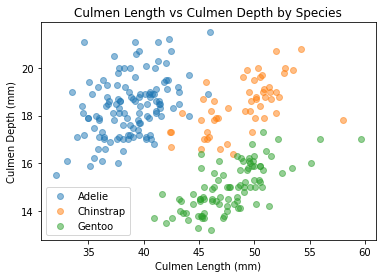

In [9]:
fig, ax = plt.subplots(1)

# dictionary with species corresponding to their label
species = {
    0 : "Adelie",
    1 : "Chinstrap",
    2 : "Gentoo"
}

# loop through the species numbers
for penguin in species.keys():
    # boolean array, True where species == species we are looping through
    sp = df["Species"] == penguin
    
    # get culmen lengths of the species
    length = df[sp]["Culmen Length (mm)"]
    
    # get culmen depth of the species
    depth = df[sp]["Culmen Depth (mm)"]
    
    # scatter culmen length vs depth, label as species name, 
    # set transparency to 0.5
    ax.scatter(length, depth, label = species[penguin], alpha=0.5)
    

# show legend
ax.legend()

# set axis labels and title
ax.set(xlabel = "Culmen Length (mm)",
       ylabel = "Culmen Depth (mm)",
       title = "Culmen Length vs Culmen Depth by Species")

In the figure, we can see the different distribution for each species. Adelie penguins generally have a shorter but deeper culmen. Gentoo penguins generally have a medium to long but shallower culmen. Chinstrap penguins generally have a medium to long but deep culmen.

What happens when we group each penguin by island rather than species?

[Text(0.5, 0, 'Culmen Length (mm)'),
 Text(0, 0.5, 'Culmen Depth (mm)'),
 Text(0.5, 1.0, 'Culmen Length vs Culmen Depth by Island')]

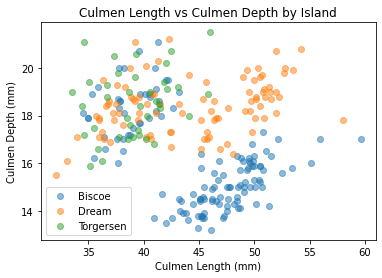

In [10]:
fig, ax = plt.subplots(1)

islands = {
    0 : "Biscoe",
    1 : "Dream",
    2 : "Torgersen"
}
# loop through each island
for island in islands.keys():
    # create dataframe with only the current island 
    # get culmen length and depth from this dataframe
    islnd = df["Island"] == island
    length = df[islnd]["Culmen Length (mm)"]
    depth = df[islnd]["Culmen Depth (mm)"]
    
    # scatter culmen length against depth, label each island
    # set transparency to 0.5
    ax.scatter(length, depth, label=islands[island], alpha=0.5)

# show legend
ax.legend()

# set axis labels and title
ax.set(xlabel = "Culmen Length (mm)",
       ylabel = "Culmen Depth (mm)",
       title = "Culmen Length vs Culmen Depth by Island")

When we group the penguins by island, the groupings in the scatterplot become less clear. There is a chunk of penguins from Biscoe that have a similar grouping to the Gentoo penguins, but other than that, the penguins do not have a distict separation

## 3. Feature Selection
For this project, we will use one qualitative feature (like Island or Sex) and two quantitative features (like Culmen Length or Body Mass). We can either hand pick our features based on the exploratory data analysis, or we can use an automated feature selection. In this case, we will use an automated feature selection.

First, we need to import some functions for our feature selection.

In [11]:
from sklearn.model_selection import cross_val_score
from itertools import combinations

import numpy as np

We can write a function to  check all combinations of columns for the model and return the columns with the best cross validation score.

In [170]:
def exhaustive_search(model, X, y, min_cols, max_cols):
    """
    Searches for the combination of columns ranging from 
    min_cols to max_cols that gives the best cv score for the 
    model.
    Returns the best cross validation score and the three columns 
    associated with it. 
    """
    # initialize best score and col choice
    best_cv = 0
    best_cols = None
    
    # loop over admissible col selections 
    for n_cols in range(min_cols, max_cols + 1):
        for cols in combinations(X.columns, n_cols):
            combo = np.asarray(list(cols))
            # only check the columns if there is one qualitative value
            island = (combo == "Island").any()
            sex = (combo == "Sex").any()
            if (island and not sex) | (sex and not island):
                # compute Cv for each col selection
                X_sub = X[list(cols)]
                cv = cross_val_score(model, X_sub, y, cv = 10).mean()
            
                # update best scores
                if cv > best_cv:
                    best_cv = cv
                    best_cols = cols
    
    return best_cv, best_cols

We can also write a function to find the best complexity for a model.

In [169]:
# selecting complexity
def select_complexity(model, X, y, complexity_kw, possible_complexities, **kwargs):
    """
    Finds the complexity that results in the best cv score for the model.
    Returns the best complexity and the best score associated with it.
    """
    
    best_score = 0
    
    # loop through possible complexities
    for C in possible_complexities:
        # create the model based on arguments supplied
        comp = {complexity_kw : C}
        m = model(**comp, **kwargs)
        
        # find the average cv score for 10 folds
        cv_score = cross_val_score(m, X, y, cv=10).mean()
        
        # update the best complexity and best column if cv score is better
        if cv_score > best_score:
            best_C = C
            best_score = cv_score
            
    return best_C, best_score

We can now use these functions to automate our feature selection. First, we can use the **exhaustive_search()** function to find the best columns. Then, we can use **select_complexity()** to select the best complexity based on the best columns. After we do this, we can create and train our model using the best complexity and best columns and evaluate it. 

## 4. Modeling

### (a) Model 1: Random Forest

First we need to import the `RandomForestClassifier` class from `sklearn.ensemble`.

In [46]:
from sklearn.ensemble import RandomForestClassifier

From here, we can create a RandomForestClassifier and find the best columns using our **exhaustive_search** function.

In [188]:
RF = RandomForestClassifier()
best_cv, best_cols = exhaustive_search(RF, X_train, y_train, 3, 3)
best_cv, best_cols

(0.9961538461538462, ('Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'))

From here, we can use the **select_complexity** function to find the best complexity for the Random Forest based on the best columns.

In [189]:
depth = select_complexity(RandomForestClassifier, X_train[list(best_cols)], y_train, "max_depth", range(1, 15))
depth

(5, 0.9961538461538462)

Now that we know the best columns and best depth for our Random Forest, we can create a Random Forest with a specified max depth. Then we can train it on the training data using only the best columns. 

In [190]:
RF = RandomForestClassifier(max_depth = depth[0])
RF.fit(X_train[list(best_cols)], y_train)

RandomForestClassifier(max_depth=5)

Now let's see how our model does against the test set!

In [191]:
RF.score(X_train[list(best_cols)], y_train), RF.score(X_test[list(best_cols)], y_test)

(1.0, 0.8636363636363636)

Our model scored 1.0 on the training set, which means it perfectly predicts the training set. The model may be overfitting to the training set, which we can look at using a confusion matrix. A confusion matrix is a simple visualization of the model's predictions against the truth. The `ith`, `jth` entry gives the number of times the model predicted `i` when the species was in fact `j`. <br><br>

This is an array of our model's predictions based on the training set.

In [192]:
y_train_pred = RF.predict(X_train[list(best_cols)])
y_train_pred

array([1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2,
       2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0,
       0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2,
       1, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 2, 1, 2, 2, 1, 1,
       2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0])

We can import `confusion_matrix` from `sklearn.metrics` to create a confusion matrix for the training data. 

In [193]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_train, y_train_pred)
c

array([[121,   0,   0],
       [  0,  52,   0],
       [  0,   0,  91]], dtype=int64)

We can see that the model perfectly predicts each species (diagonal where `i` == `j`). Now let's see the confusion matrix for the test set.

In [194]:
y_test_pred = RF.predict(X_test[list(best_cols)])
c = confusion_matrix(y_test, y_test_pred)
c

array([[20,  0,  0],
       [ 4,  6,  5],
       [ 0,  0, 31]], dtype=int64)

The model only gets a couple of the species wrong. It predicts species 0 (Adelie) when the actual species was 1 (Chinstrap) four times. It predicts species 2 (Gentoo) when the species was 1 (Chinstrap) five times. Although the confusion matrix tells us which species our model predicted incorrectly, it doesn't show how our model actually decides the species of a penguin. To see this, we can plot a decision region for it. 
<br><br>
First, let's write a function to plot our decision regions. Our function will separate and plot the data supplied based on the qualitative variable, then make a contour plot to visualize the predictions. 

In [215]:
from matplotlib.patches import Rectangle
def plot_regions(c, X, y, x_axis, y_axis, titles, qual_col, qual_vals, order):
    
    """
    Plots the decision regions for the model c, predictors X, 
    target y, x axis values, y axis values, and a qualitative 
    value specified in kwargs. 
    """
    # creates the figure
    fig, ax = plt.subplots(1, len(qual_vals), figsize = (10, 4))
    
    # loops through x and y axis data for each qualitative value
    # ex: loops through each island or each sex
    for i in range(len(qual_vals)):

        # two columns of data that we are using
        # get the x and y data for only the qualitative value we are plotting 
        # on the specific axis
        x0 = X[X[qual_col] == qual_vals[i]][x_axis]
        x1 = X[X[qual_col] == qual_vals[i]][y_axis]

        # create a grid
        grid_x = np.linspace(x0.min(),x0.max(),501)
        grid_y = np.linspace(x1.min(),x1.max(),501)
        xx, yy = np.meshgrid(grid_x, grid_y)

        # extract model predictions
        # array.ravel() converts a multidimensional array into a 1d array, 
        # and we use array.reshape() to turn the resulting predictions p 
        # back into 2d
        XX = xx.ravel()
        YY = yy.ravel()
        XY = pd.DataFrame({
            x_axis   : XX,
            y_axis   : YY,
        })
        # add the qualitative value into the dataframe, since the model requires the two
        # quantitative values and one qualitative
        XY.insert(order.index(qual_col), qual_col, qual_vals[i])
        
        
        # model predictions
        p = c.predict(XY)
        p = p.reshape(xx.shape)
        
        # use contour plot to visualize the predictions
        ax[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
        
        # scatter the points for the specific qualitiative value
        ax[i].scatter(x0, 
                      x1, 
                      c = y[X[qual_col] == qual_vals[i]],
                      cmap = "jet", 
                      vmin = 0, 
                      vmax = 2)
        
        # set axis labels (x axis, y axis, and title)
        ax[i].set(xlabel = x_axis, 
                ylabel = y_axis,
               title = titles[i])
        
    plt.tight_layout()
    
    # create a legend
    # select the "jet" colormap
    cmap = plt.get_cmap('jet')
    
    # set colors for the different species
    adelie = cmap(0)
    chinstrap =cmap(0.5)
    gentoo = cmap(.99)
    
    # create colored rectangles based on the species colors
    handles = [Rectangle((5,0),1,1,color=c) for c in [adelie, chinstrap, gentoo]]
    # create labels for these rectangles
    labels= ["Adelie","Chinstrap", "Gentoo"]
    
    # add colored rectangles and labels to figure, placed on the right of the last axis
    ax[i].legend(handles, labels, bbox_to_anchor=(1.15, 0.6), bbox_transform=fig.transFigure)

We know that our Random Forest model scored perfectly on the training data, so we expect the decision region for the training set to match perfectly with the data. 

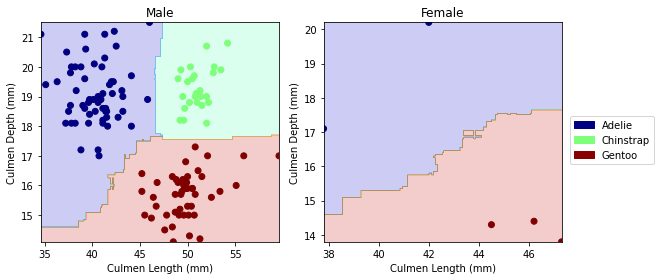

In [198]:
plot_regions(RF, 
             X_train, 
             y_train, 
             x_axis = "Culmen Length (mm)", 
             y_axis = "Culmen Depth (mm)", 
             titles = ["Male", "Female"],
             qual_col = "Sex",
             qual_vals = [1, 2],
             order = list(best_cols))

On the test set, however, our model didn't perform so well...

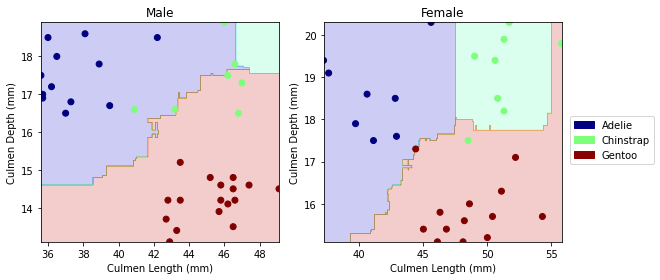

In [199]:
plot_regions(RF, 
             X_test, 
             y_test, 
             x_axis = "Culmen Length (mm)", 
             y_axis = "Culmen Depth (mm)", 
             titles = ["Male", "Female"],
             qual_col = "Sex",
             qual_vals = [1, 2],
             order = list(best_cols))

We can see that most of the wrong predictions were made in the males and were Chinstrap penguins being mistaken for another species. In the test set, many of the male Chinstrap penguins had a shorter Culmen Length (less than 47 mm) compared to the training set, which was around 50 mm. In addition, the Culmen Depth for the male Chinstrap penguins was lower compared to those in the training set. The model was trained to identify Chinstrap penguins if they had longer and deeper culmens compared to the ones in the test set. As a result of the training and test splitting, many of the male Chinstrap penguins were incorrectly classified. 
<br><br>
In the females, the two penguins that were incorrectly classified had shorter than most Culmen Length or Depth, resulting in the wrong classification. 
<br><br>
For our next two models, we can repeat the steps we used in the Random Forest to select our model and visualize its predictions:
1. Create an instance of the model and find the best columns using the **exhaustive search** function we wrote earlier. 
2. Use the **select_complexity** function to find the best complexity for the model based on the best columns.
3. Create the model based on the best complexity and train it on the training data for the best columns. 
4. Score the model against the test set.
5. Create a confusion matrix and decision region to see where the model makes mistakes.

### (b) Model 2: Neural Network
We first need to import our model `neural_network` from `sklearn`. We also need to import `product` from `itertools`, which will help us in determining the best complexity.

In [202]:
from sklearn import neural_network
from itertools import product

Our first step is to create an instance of our neural network and find the best columns. 

In [203]:
MLP = neural_network.MLPClassifier(max_iter = 1000000)
best_cv, best_cols = exhaustive_search(MLP, X_train, y_train, 3, 3)
best_cv, best_cols

(0.9849002849002849, ('Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'))

Our second step is to find the best complexity for the model based on the three best columns. **layer_configs** gives the possible hidden layer sizes that we are choosing to check.

In [204]:
layer_sizes = [10, 50, 100]
layer_configs = product(layer_sizes, layer_sizes)
complexity = select_complexity(neural_network.MLPClassifier, 
                               X_train[list(best_cols)], 
                               y_train, 
                               "hidden_layer_sizes", 
                               layer_configs, 
                               solver = "adam", 
                               max_iter = 1000000)

In [205]:
complexity

((50, 10), 0.9886039886039886)

Now that we have the best columns and the best complexity, we can move on to step three and train our model.

In [206]:
MLP = neural_network.MLPClassifier(hidden_layer_sizes = complexity[0], max_iter = 1000000, solver = "adam")
MLP.fit(X_train[list(best_cols)], y_train)

MLPClassifier(hidden_layer_sizes=(50, 10), max_iter=1000000)

Let's see how the neural network scores against the test set!

In [207]:
MLP.score(X_train[list(best_cols)], y_train), MLP.score(X_test[list(best_cols)], y_test)

(0.9886363636363636, 0.9848484848484849)

Nice! Our model scored about the same on both the training and test sets, meaning that it didn't overfit like the random forest. Let's see the confusion matrices for both sets. 

In [208]:
y_train_pred = MLP.predict(X_train[list(best_cols)])

In [209]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_train, y_train_pred)
c

array([[121,   0,   0],
       [  2,  49,   1],
       [  0,   0,  91]], dtype=int64)

In the training set, the neural network predicted species 0 (Adelie) when the species was actually 1 (Chinstrap) twice. It predicted species 2 (Gentoo) when the species was actually 1 (Chinstrap) once. 

In [213]:
y_test_pred = MLP.predict(X_test[list(best_cols)])
c = confusion_matrix(y_test, y_test_pred)
c

array([[20,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 30]], dtype=int64)

In the test set, it only got one species wrong. 

Let's visualize the neural network's decision regions using our **plot_regions()** function.

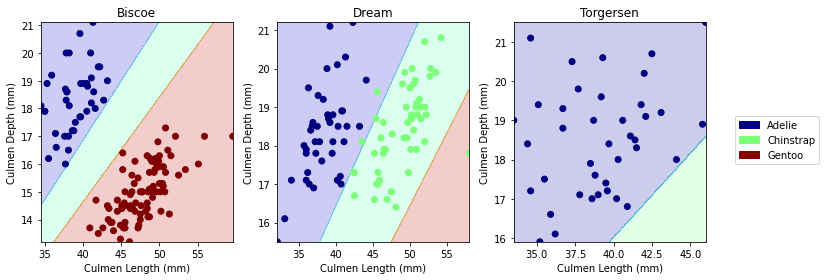

In [216]:
plot_regions(MLP, 
             X_train, 
             y_train, 
             x_axis = "Culmen Length (mm)", 
             y_axis = "Culmen Depth (mm)", 
             titles = ["Biscoe", "Dream", "Torgersen"],
             qual_col = "Island",
             qual_vals = [0, 1, 2],
             order = list(best_cols))

We can see that on the Dream island for the training set, the model predicted Adelie when the species was Chinstrap once. 
<br><br>
Now let's see the test set region.

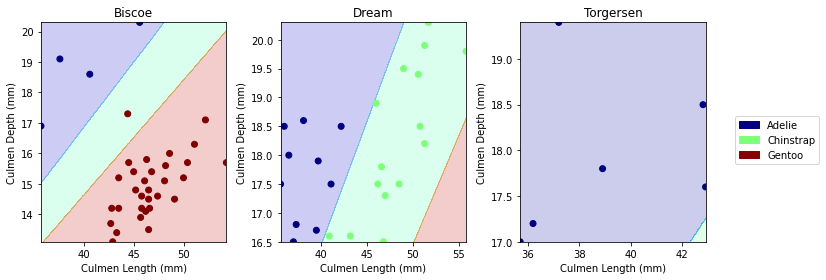

In [217]:
plot_regions(MLP, 
             X_test, 
             y_test, 
             x_axis = "Culmen Length (mm)", 
             y_axis = "Culmen Depth (mm)", 
             titles = ["Biscoe", "Dream", "Torgersen"],
             qual_col = "Island",
             qual_vals = [0, 1, 2],
             order = list(best_cols))

It seems like the neural network was able to more clearly separate the species than the random forest. The neural network divided the penguins by island, then was able to create accurate decision regions based off this splitting. It classified the penguins wrong when they were outliers, but most of the time it was correct. It also performed much better than the random forest!

### (c) Model 3: Logistic Regression
Our final model is Logistic Regression. Like always, we first need to import the model from `sklearn`.

In [234]:
from sklearn.linear_model import LogisticRegression

Searching for the best columns and complexity. 

In [241]:
LR = LogisticRegression(max_iter = 100000)
best_cv, best_cols = exhaustive_search(LR, X_train, y_train, 3, 3)
best_cv, best_cols

(0.9924501424501424, ('Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'))

In [242]:
complexity = select_complexity(LogisticRegression, X_train[list(best_cols)], y_train, "C", 10.0**np.arange(-5, 5), solver = "liblinear")
complexity

(100.0, 0.9961538461538462)

Create the model with the best complexity and train it based on the best columns. 

In [243]:
LR = LogisticRegression(max_iter = 100000, C = complexity[0])
LR.fit(X_train[list(best_cols)], y_train)

LogisticRegression(C=100.0, max_iter=100000)

Score the model against the training set.

In [255]:
LR.score(X_train[list(best_cols)], y_train), LR.score(X_test[list(best_cols)], y_test)

(1.0, 0.8333333333333334)

Uh oh... Again, our model seems to be overfitting to the training data. The logistic regression and the random forest both overfitted to the training data, and they both had the same **best_cols**. This overfitting could be a result of the random train and test split which resulted in differences in the sexes for the different sets. Consequently, the set the model was trained on didn't accurately represent all the penguins, and the model did not perform well on the test set. 
<br><br>
Just to see where our model went wrong, let's again create a confusion matrix and decision region for the training and test sets. 

In [259]:
y_train_pred = LR.predict(X_train[list(best_cols)])

In [260]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_train, y_train_pred)
c

array([[121,   0,   0],
       [  0,  52,   0],
       [  0,   0,  91]], dtype=int64)

In [261]:
y_test_pred = LR.predict(X_test[list(best_cols)])
c = confusion_matrix(y_test, y_test_pred)
c

array([[20,  0,  0],
       [ 5,  5,  5],
       [ 1,  0, 30]], dtype=int64)

The logistic regression model predicted 11 wrong, according to the confusion matrix. Let's compare the training and test decision regions.

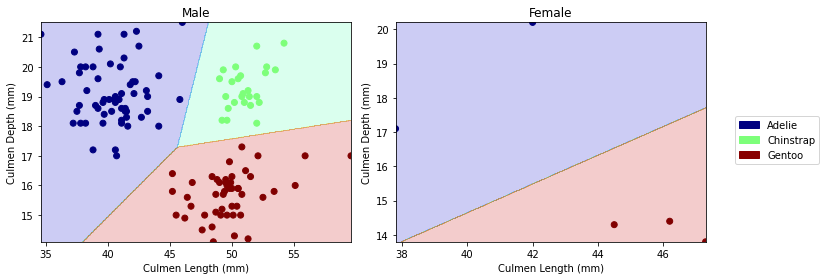

In [262]:
plot_regions(LR, 
             X_train, 
             y_train, 
             "Culmen Length (mm)", 
             "Culmen Depth (mm)", 
             ["Male", "Female"],
             "Sex",
             [1, 2],
             list(best_cols))

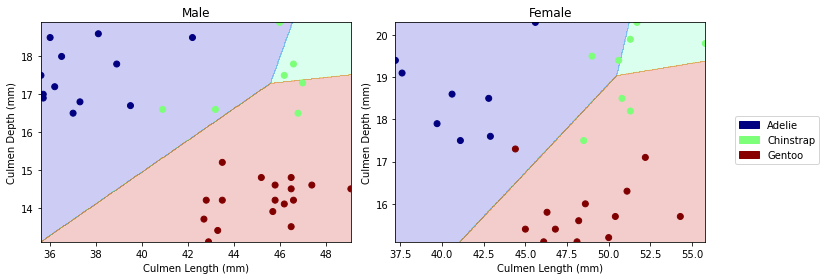

In [263]:
plot_regions(LR, 
             X_test, 
             y_test, 
             "Culmen Length (mm)", 
             "Culmen Depth (mm)", 
             ["Male", "Female"],
             "Sex",
             [1, 2],
             list(best_cols))

The logistic regression model does have the same problem that the random forest does. As we can see, the decision regions in the training set accurately predict every species. However, in the test set, there are multiple outliers for Chinstrap penguins that the model predicts wrong. It seems like the problem here is that separating the penguins by sex prevents the models from accurately predicting test data. 

Overall, the model that performed the best was the neural network, using the Culmen Length, Culmen Depth, and Island and predictors. If there were more data points or if we selected more than three features, perhaps the predictions could be improved for this model and the other models. Although we were working on penguins data, these concepts can be applied to any other data set using these same techniques!